<a href="https://colab.research.google.com/github/anky19698/Cricket_Analytics/blob/main/Win_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing IPL Data


In [1]:
# Get the T20 Ball by Ball Data

import requests
import zipfile
import io
import os
import pandas as pd
import glob
import os
import numpy as np

url = 'https://cricsheet.org/downloads/ipl_csv2.zip'

response = requests.get(url)
destination_folder = 't20_male_csv'

if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content), 'r') as zip_ref:
        zip_ref.extractall(destination_folder)
        print('success')
else:
    print('failed')




success


In [3]:
files = glob.glob('/content/t20_male_csv/[0-9]*.csv')
all_files = []
for file in files:
  filename = os.path.basename(file)
  # print(filename[:-4])
  if 'info' not in filename:
    # print(filename)
    all_files.append(file)

df = pd.concat((pd.read_csv(f, header = 0) for f in all_files))

# exporting final csv without super overs data

df = df[df['innings'] < 3]

df.to_csv('ipl_ball_by_ball.csv', index=False)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [238]:
ipl_df = pd.read_csv('ipl_ball_by_ball.csv')

In [239]:
ipl_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1254110,2021,2021-10-04,Dubai International Cricket Stadium,1,0.1,Chennai Super Kings,Delhi Capitals,RD Gaikwad,F du Plessis,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1254110,2021,2021-10-04,Dubai International Cricket Stadium,1,0.2,Chennai Super Kings,Delhi Capitals,RD Gaikwad,F du Plessis,...,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1254110,2021,2021-10-04,Dubai International Cricket Stadium,1,0.3,Chennai Super Kings,Delhi Capitals,RD Gaikwad,F du Plessis,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1254110,2021,2021-10-04,Dubai International Cricket Stadium,1,0.4,Chennai Super Kings,Delhi Capitals,RD Gaikwad,F du Plessis,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1254110,2021,2021-10-04,Dubai International Cricket Stadium,1,0.5,Chennai Super Kings,Delhi Capitals,RD Gaikwad,F du Plessis,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
ipl_df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [241]:
# Excluding Super Over Data

ipl_df = ipl_df[(ipl_df.innings == 1) | (ipl_df.innings == 2)]

# Additional Colums:

In [242]:
ipl_df['total_runs'] = ipl_df.apply(lambda x: x['runs_off_bat'] + x['extras'], axis = 1)

In [243]:
ipl_df['isOut'] = ipl_df['player_dismissed'].apply(lambda x: 1 if type(x) == type('str') else 0)

In [244]:
ipl_df.batting_team.unique()

array(['Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Kings XI Punjab',
       'Rajasthan Royals', 'Delhi Daredevils', 'Kolkata Knight Riders',
       'Deccan Chargers', 'Mumbai Indians', 'Gujarat Titans',
       'Gujarat Lions', 'Sunrisers Hyderabad', 'Pune Warriors',
       'Rising Pune Supergiants', 'Lucknow Super Giants',
       'Kochi Tuskers Kerala', 'Punjab Kings', 'Rising Pune Supergiant'],
      dtype=object)

In [245]:
ipl_df[ipl_df.batting_team == 'Punjab Kings'].total_runs.value_counts()

1    2067
0    1830
4     582
6     318
2     317
5      13
3      11
7       2
Name: total_runs, dtype: int64

In [246]:
ipl_df[ipl_df.batting_team == 'Delhi Capitals'].total_runs.value_counts()

1    3978
0    3148
4    1134
2     572
6     412
3      30
5      13
7       3
Name: total_runs, dtype: int64

# Choose Teams:

In [247]:
# t1 - bat first, t2 - bat second
# Ex: MI vs RCB, (match_id: 1254058)

t1 = 'Gujarat Titans'
t2 = 'Chennai Super Kings'


required_match_id = 1370353

In [248]:
# Checking All Matches Between MI and RCB where MI always Batted First

ipl_df[(ipl_df.batting_team == t1) & (ipl_df.bowling_team == t2) & (ipl_df.innings == 1)].match_id.unique()

array([1370353])

In [249]:
ipl_df[ipl_df.match_id == required_match_id].head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
185066,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [250]:
# Calculate Total Wickets for Both Teams

t1_outs = ipl_df[ipl_df.batting_team == t1].isOut.sum()
t2_outs = ipl_df[ipl_df.batting_team == t2].isOut.sum()

t1_outs, t2_outs

(168, 1166)

In [251]:
# Checking Outcome Counts on Every Ball

t1_outcomes = ipl_df[ipl_df.batting_team == t1].total_runs.value_counts()
t2_outcomes = ipl_df[ipl_df.batting_team == t2].total_runs.value_counts()

t1_outcomes, t2_outcomes

(1    1796
 0    1209
 4     514
 2     277
 6     202
 5      13
 3       9
 7       1
 Name: total_runs, dtype: int64,
 1    11334
 0     9171
 4     3029
 2     1839
 6     1392
 3      106
 5       47
 7        9
 Name: total_runs, dtype: int64)

In [252]:
# Excluding 5 and 7 Since they are Rare

outcomes = [0, 1, 2, 3, 4, 6, 'w']

In [253]:
# Outcomes List

t1_outcomes_count = []
for outcome in outcomes:
    try:
        if outcome != 'w':
            t1_outcomes_count.append(t1_outcomes[outcome])
        else:
            t1_outcomes_count.append(t1_outs)
    except:
        t1_outcomes_count.append(0)


t2_outcomes_count = []
for outcome in outcomes:
    try:
        if outcome != 'w':
            t2_outcomes_count.append(t2_outcomes[outcome])
        else:
            t2_outcomes_count.append(t2_outs)
    except:
        t2_outcomes_count.append(0)

t1_outcomes_count, t2_outcomes_count

([1209, 1796, 277, 9, 514, 202, 168],
 [9171, 11334, 1839, 106, 3029, 1392, 1166])

In [254]:
# Calculating Probabilties of Outcomes

t1_pb = [i/sum(t1_outcomes_count) for i in t1_outcomes_count]
t2_pb = [i/sum(t2_outcomes_count) for i in t2_outcomes_count]

#t1_pb, t2_pb

In [255]:
# Calculating Cumulative Probability for Better Simulation

t1_cum_pb = list(np.cumsum(t1_pb))
t2_cum_pb = list(np.cumsum(t2_pb))

t1_cum_pb,t2_cum_pb

([0.2895808383233533,
  0.7197604790419161,
  0.7861077844311376,
  0.7882634730538921,
  0.9113772455089819,
  0.9597604790419161,
  0.9999999999999999],
 [0.32710347041409565,
  0.7313549951849342,
  0.7969468916075186,
  0.8007276099440026,
  0.9087634197667368,
  0.9584120982986768,
  1.0])

# Function: 1st Innings runs prediction

In [256]:
# first innings
def innings_1_runs(curr_overs, curr_score, curr_wickets):
    i1p_0 = t1_cum_pb[0]
    i1p_1 = t1_cum_pb[1]
    i1p_2 = t1_cum_pb[2]
    i1p_3 = t1_cum_pb[3]
    i1p_4 = t1_cum_pb[4]
    i1p_6 = t1_cum_pb[5]
    i1p_w = 1

    # initialize runs, wickets
    pred_runs = curr_score
    pred_wks = curr_wickets

    # calculate leftover balls
    over_ball = curr_overs
    over_number = int(str(over_ball).split('.')[0])
    ball_number = int(str(over_ball).split('.')[1])

    if ball_number >= 6:
        ball_number = 6
    current_balls = over_number*6 + ball_number
    leftover_balls = 120 - current_balls

    for i in range(leftover_balls):

        r_value = np.random.random()

        if r_value <= i1p_0:
            pred_runs += 0
        elif r_value <= i1p_1:
            pred_runs += 1
        elif r_value <= i1p_2:
            pred_runs += 2
        elif r_value <= i1p_3:
            pred_runs += 3
        elif r_value <= i1p_4:
            pred_runs += 4
        elif r_value <= i1p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break

    return pred_runs

In [257]:
# innings_1_runs(curr_overs, curr_score, curr_wickets)
innings_1_runs(10.0, 100, 0)

176

# Function: 2nd Innings runs prediction

In [258]:
# second innings

total_balls = 90 # DLS

def innings_2_runs(curr_overs, curr_score, curr_wickets, target):
    i2p_0 = t2_cum_pb[0]
    i2p_1 = t2_cum_pb[1]
    i2p_2 = t2_cum_pb[2]
    i2p_3 = t2_cum_pb[3]
    i2p_4 = t2_cum_pb[4]
    i2p_6 = t2_cum_pb[5]
    i2p_w = 1

    # initialize runs, wickets
    pred_runs = curr_score
    pred_wks = curr_wickets

    # calculate leftover balls
    over_ball = curr_overs
    over_number = int(str(over_ball).split('.')[0])
    ball_number = int(str(over_ball).split('.')[1])

    if ball_number >= 6:
        ball_number = 6
    current_balls = over_number*6 + ball_number
    leftover_balls = total_balls - current_balls

    for i in range(leftover_balls):

        r_value = np.random.random()

        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break

        if pred_runs > target:
            break

    return pred_runs

In [259]:
# innings_2_runs(curr_overs, curr_score, curr_wickets, target)
innings_2_runs(10.0, 100, 8, 167)

103

#  Selecting Match For Prediction

In [260]:
# Selecting the Match for Simulation

t1 = 'Gujarat Titans'
t2 = 'Chennai Super Kings'

ipl_df[(ipl_df.batting_team == t1) & (ipl_df.bowling_team == t2) & (ipl_df.innings == 1)].match_id.unique()

required_match_id = 1370353

In [261]:
mdf = ipl_df[ipl_df.match_id == required_match_id]

In [262]:
mdf.reset_index(inplace = True, drop = True)

In [263]:
mdf.head(3)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [264]:
df_ing1 = mdf[mdf.innings == 1]
df_ing2 = mdf[mdf.innings == 2]

In [265]:
df_ing1 = df_ing1.sort_values('ball', ascending = True)
df_ing2 = df_ing2.sort_values('ball', ascending = True)

In [266]:
df_ing1.reset_index(inplace = True, drop = True)
df_ing2.reset_index(inplace = True, drop = True)

In [267]:
len(df_ing1), len(df_ing2)

(122, 94)

# Runs prediction: 1st Innings

In [268]:
# Predicting at Every Ball

curr_score = 0
curr_wickets = 0
curr_overs = 0.0

ing1_runs_pred = []

for i in range(len(df_ing1)):
    curr_score += df_ing1.total_runs[i]
    curr_overs = df_ing1.ball[i]
    curr_wickets += df_ing1.isOut[i]

    prediction = innings_1_runs(curr_overs, curr_score, curr_wickets)
#     print('score: ', curr_score, ' overs: ', curr_overs, ' wickets: ', curr_wickets, ' prediction: ', prediction)
    ing1_runs_pred.append(prediction)

In [269]:
ing1_actual_score = sum(df_ing1.total_runs)

ing1_actual_score

214

# Runs prediction: 2nd Innings

In [270]:
# Predicting at Every Ball

curr_score = 0
curr_wickets = 0
curr_overs = 0.0
# target = ing1_actual_score
target = 170 # DLS

ing2_runs_pred = []

for i in range(len(df_ing2)):
    curr_score += df_ing2.total_runs[i]
    curr_overs = df_ing2.ball[i]
    curr_wickets += df_ing2.isOut[i]

    prediction = innings_2_runs(curr_overs, curr_score, curr_wickets, target)
#     print('target: ', target)
#     print('score: ', curr_score, ' overs: ', curr_overs, ' wickets: ', curr_wickets, ' prediction: ', prediction)
    ing2_runs_pred.append(prediction)

# Runs prediction chart: 1st Innings

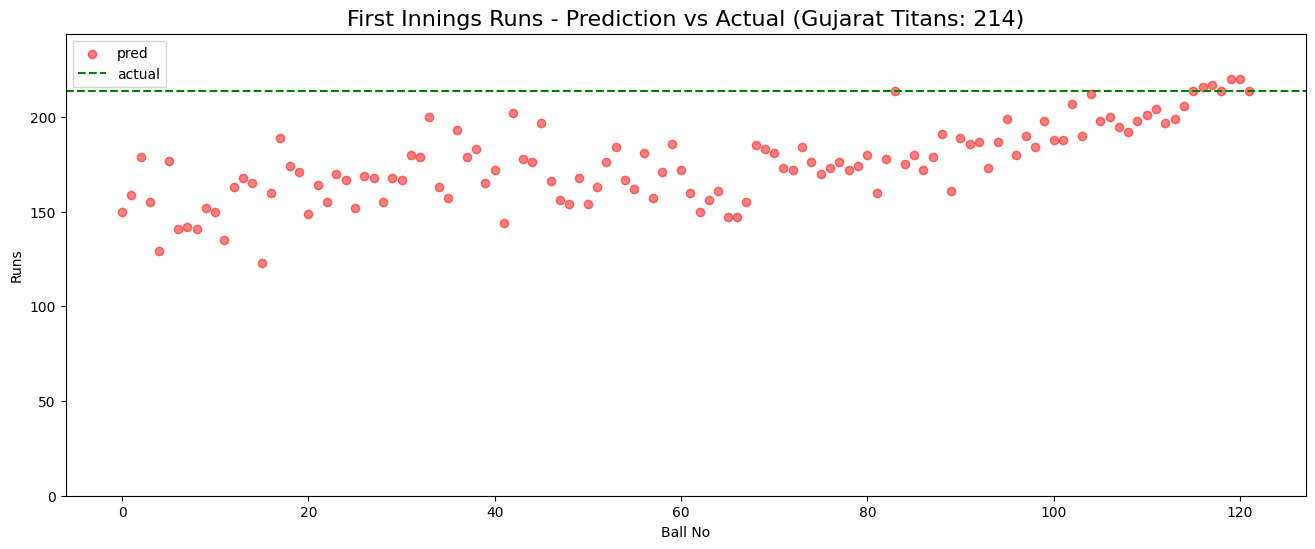

In [271]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing1_runs_pred))], ing1_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing1_actual_score + 30)
plt.axhline(ing1_actual_score, ls = '--', label = 'actual', color = 'green')
plt.title('First Innings Runs - Prediction vs Actual (' + t1 + ': ' + str(ing1_actual_score) +  ')', fontsize = 16)
plt.legend()
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.show()

## Error in 1st Innings runs:

In [272]:
np.mean([abs(i - ing1_actual_score) for i in ing1_runs_pred])

38.540983606557376

In [273]:
ing2_actual_score = sum(df_ing2.total_runs)
ing2_actual_score

171


# Runs prediction chart: 2nd Innings

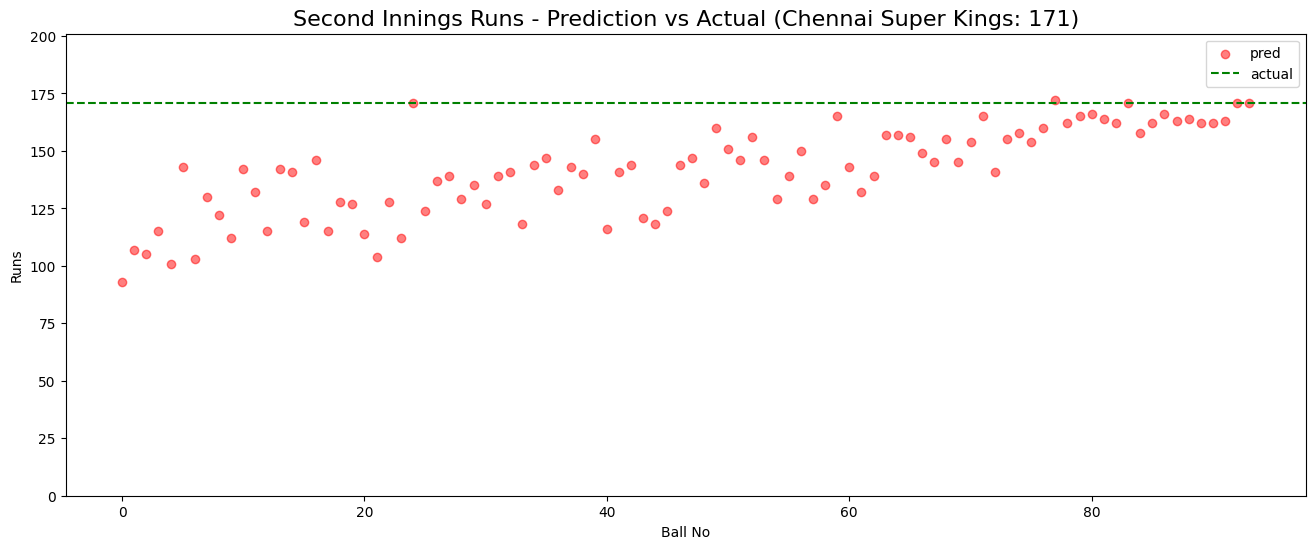

In [274]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing2_runs_pred))], ing2_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing2_actual_score + 30)
plt.axhline(ing2_actual_score, ls = '--', label = 'actual', color = 'green')
plt.title('Second Innings Runs - Prediction vs Actual (' + t2 + ': ' + str(ing2_actual_score) +  ')', fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.legend()
plt.show()

## Error in 2nd Innings runs:

In [275]:
np.mean([abs(i - ing2_actual_score) for i in ing2_runs_pred])

29.70212765957447

# Win predictions: 1st Innings

In [276]:
# 1, 2 innings & predict win

# for each ball make a prediction: 1st runs, 2nd runs, win/lose/tie

# initialize win/tie/lose
win_count = 0
tie_count = 0
lose_count = 0

win_count_ls = []
tie_count_ls = []
lose_count_ls = []

ing1_curr_score = 0
ing1_curr_overs = 0
ing1_curr_wickets = 0

# each ball
for i in range(len(df_ing1)):

    # 1st innings values
    ing1_curr_score += df_ing1.total_runs[i]
    ing1_curr_overs = df_ing1.ball[i]
    ing1_curr_wickets += df_ing1.isOut[i]

    #2nd innings values
    ing2_curr_score = 0
    ing2_curr_wickets = 0
    ing2_curr_overs = 0.0

    # make a prediction for 100 times & get win/lose/tie count(ex: 28% win)
    for j in range(100):

        ing1_prediction = innings_1_runs(ing1_curr_overs, ing1_curr_score, ing1_curr_wickets)
        target = ing1_prediction

        ing2_prediction = innings_2_runs(ing2_curr_overs, ing2_curr_score, ing2_curr_wickets, target)

#         print(ing1_prediction, ing2_prediction)

        # prediction w.r.t 2nd team
        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1

    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)

    win_count = 0
    tie_count = 0
    lose_count = 0

# Win predictions: 2nd Innings

In [277]:
# each ball
#2nd innings values
ing2_curr_score = 0
ing2_curr_wickets = 0
ing2_curr_overs = 0.0

for i in range(len(df_ing2)):

    # 1st innings values
    # target = ing1_actual_score
    target = 170 # DLS


    #2nd innings values
    ing2_curr_score += df_ing2.total_runs[i]
    ing2_curr_wickets += df_ing2.isOut[i]
    ing2_curr_overs = df_ing2.ball[i]

    # make a prediction for 100 times & get win/lose/tie count(ex: 28% win)
    for j in range(100):
        ing2_prediction = innings_2_runs(ing2_curr_overs, ing2_curr_score, ing2_curr_wickets, target)

#         print(target, ing2_prediction)

        # prediction w.r.t 2nd team
        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1

    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)

    win_count = 0
    tie_count = 0
    lose_count = 0

# Win Percentage Chart:

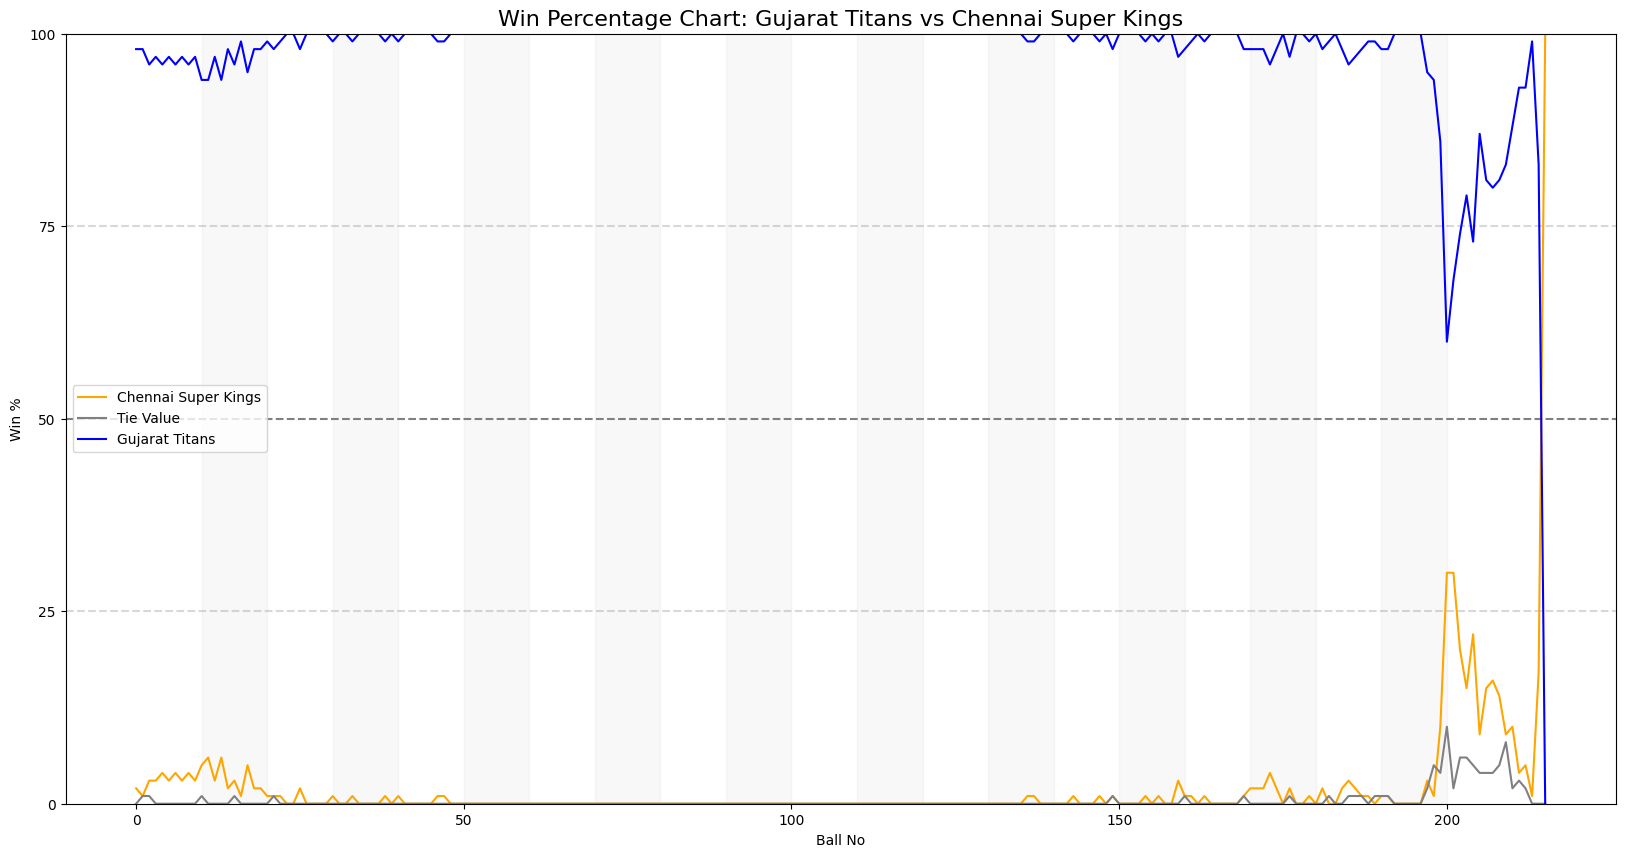

In [278]:
plt.figure(figsize = (20,10))

x1_values = [i for i in range(len(win_count_ls))]
y1_values = win_count_ls

x2_values = [i for i in range(len(tie_count_ls))]
y2_values = tie_count_ls

x3_values = [i for i in range(len(lose_count_ls))]
y3_values = lose_count_ls

for i in range(10, len(mdf), 20):
    if i < len(mdf) - 10:
        plt.axvspan(i, i+10, ymin = 0, ymax = 100, alpha = 0.05, color='grey')

plt.axhline(y = 75, ls = '--', alpha = 0.3, c = 'grey')
plt.axhline(y = 50, ls = '--', alpha = 1, c = 'grey')
plt.axhline(y = 25, ls = '--', alpha = 0.3, c = 'grey')

plt.plot(x1_values, y1_values, color = 'orange', label = t2)
plt.plot(x2_values, y2_values, color = 'grey', label = 'Tie Value')
plt.plot(x3_values, y3_values, color = 'blue', label = t1)

plt.ylim(0, 100)
plt.yticks([0, 25, 50, 75, 100])


# add confidence interval
# ci = 3
# plt.fill_between(x1_values, np.array(y1_values) - ci, np.array(y1_values) + ci, color = 'orange', alpha = 0.2 )
# plt.fill_between(x2_values, np.array(y2_values) - ci, np.array(y2_values) + ci, color = 'grey', alpha = 0.2 )
# plt.fill_between(x3_values, np.array(y3_values) - ci, np.array(y3_values) + ci, color = 'blue', alpha = 0.2 )

plt.title('Win Percentage Chart: ' + t1 + ' vs ' + t2, fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Win %')
plt.legend()
plt.show()